<div style='background-image: url("./images/header_l2.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">ObsPy Tutorial</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Handling Waveform Data</div>
        </div>
    </div>
</div>

---
## Stream & Trace
<img src="./images/Stream_Trace.svg" width=90%>

* read waveform data is returned as a **`Stream`** object.

In [1]:
%matplotlib inline
from obspy import read
import numpy as np
st = read("./data/slice*")
print (st)

2 Trace(s) in Stream:
IE.TPUB.01.HHZ       | 2016-02-05T19:57:26.098000Z - 2016-02-05T19:58:26.098000Z | 100.0 Hz, 6001 samples
IES_BATS.TPUB.01.HHZ | 2016-02-05T19:57:26.100188Z - 2016-02-05T19:58:26.100188Z | 100.0 Hz, 6001 samples


In [2]:
tr_mseed = st[0]
print tr_mseed.stats

         network: IE
         station: TPUB
        location: 01
         channel: HHZ
       starttime: 2016-02-05T19:57:26.098000Z
         endtime: 2016-02-05T19:58:26.098000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 6001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'record_length': 4096, 'encoding': u'FLOAT32', 'filesize': 24576, u'dataquality': u'D', 'number_of_records': 6, 'byteorder': u'>'})


In [3]:
tr_sac = st[1]
print tr_sac.stats

         network: IES_BATS
         station: TPUB
        location: 01
         channel: HHZ
       starttime: 2016-02-05T19:57:26.100188Z
         endtime: 2016-02-05T19:58:26.100188Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 6001
           calib: 1.0
         _format: SAC
             sac: AttribDict({u'cmpaz': 0.0, u'nzyear': 2016, u'nzjday': 35, u'iztype': 9, u'khole': u'01      ', u'knetwk': u'IES_BATS', u'lcalda': 1, u'idep': 5, u'iftype': 1, u'nvhdr': 6, u'unused23': 1, u'depmin': -39378348.0, u'kcmpnm': u'HHZ     ', u'nzsec': 59, u'internal0': 2.0, u'depmen': -2752621.0, u'cmpinc': 0.0, u'depmax': 36972376.0, u'lovrok': 1, u'stel': 370.0, u'delta': 0.0099999998, u'e': 71906.492, u'kdatrd': u'        ', u'nzmsec': 608, u'lpspol': 1, u'b': 71846.492, u'stla': 23.300501, u'leven': 1, u'stlo': 120.6296, u'ko': u'origin ', u'o': 0.39170003, u'kstnm': u'TPUB    ', u'nzmin': 59, u'npts': 6001, u'nzhour': 23})


---
## Trim, Slice, and Merge
* Trace.trim(starttime=None, endtime=None, pad=False, nearest_sample=True, fill_value=None)
  - Cut current trace to given start and end time
* Trace.slice(starttime=None, endtime=None, nearest_sample=True)
  - Return a new Trace object with data going from start to end time
* Stream.merge(method=0, fill_value=None, interpolation_samples=0, **kwargs)
  - Merge ObsPy Trace objects with same IDs

### Trim

IES_BATS.TPUB.01.HHZ | 2016-02-05T19:57:26.100188Z - 2016-02-05T19:57:36.100188Z | 100.0 Hz, 1001 samples


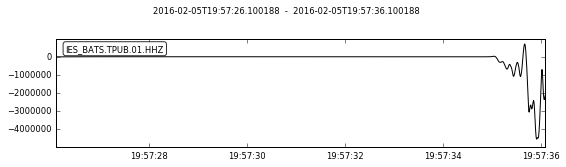

In [4]:
tr_sac_copy = tr_sac.copy()    # We don't want to cover the original trace.
t = tr_sac_copy.stats.starttime
new_tr_sac = tr_sac_copy.trim(t, t+10)
print (tr_sac_copy)
tr_sac_copy.plot()

### Slice

IES_BATS.TPUB.01.HHZ | 2016-02-05T19:57:26.100188Z - 2016-02-05T19:58:26.100188Z | 100.0 Hz, 6001 samples


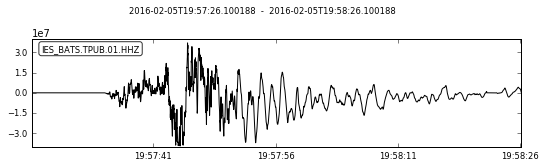

In [5]:
tr_sac_copy = tr_sac.copy()
t = tr_sac_copy.stats.starttime
new_tr_sac = tr_sac_copy.slice(t, t+10)
print (tr_sac_copy)
tr_sac_copy.plot()

IES_BATS.TPUB.01.HHZ | 2016-02-05T19:57:26.100188Z - 2016-02-05T19:57:36.100188Z | 100.0 Hz, 1001 samples


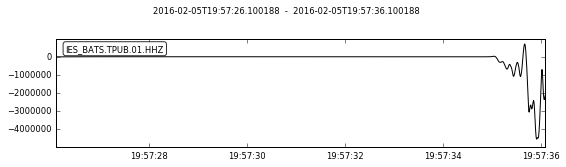

In [6]:
print (new_tr_sac)
new_tr_sac.plot()

### Merge

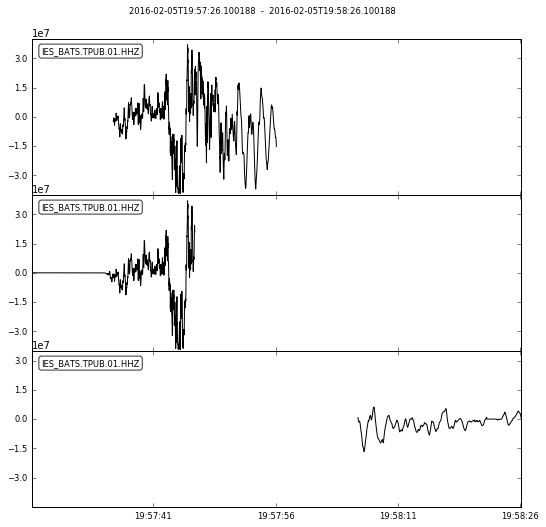

In [7]:
import obspy
tr_sac_copy = tr_sac.copy()
t = tr_sac_copy.stats.starttime
tr_sac_1 = tr_sac_copy.slice(t, t+20)
tr_sac_2 = tr_sac_copy.slice(t+10, t+30)
tr_sac_3 = tr_sac_copy.slice(t+40, t+60)
st_merge = obspy.core.Stream(traces=[tr_sac_1, tr_sac_2, tr_sac_3])
st_merge.plot()

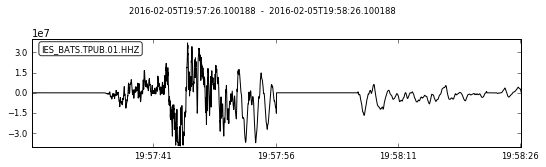

In [8]:
st_merge.merge(method=0, fill_value=0)
st_merge.plot()

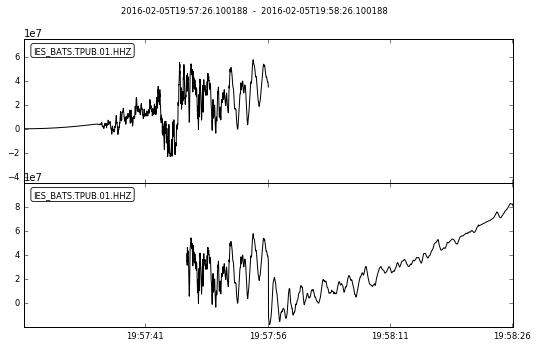

In [9]:
tr_sac_copy1 = tr_sac.copy()
t = tr_sac_copy.stats.starttime
tr_sac_1 = tr_sac_copy.slice(t, t+30)
tr_sac_1.data += 5e4 * tr_sac_1.times() ** 2
tr_sac_2 = tr_sac_copy.slice(t+20, t+60)
tr_sac_2.data += 5e4 * tr_sac_2.times() ** 2
st_merge = obspy.core.Stream(traces=[tr_sac_1, tr_sac_2])
st_merge.plot()

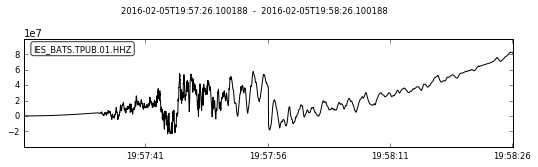

In [10]:
# Trace 1: AAAAAAAA
# Trace 2:     FFFFFFFF
# 1 + 2  : AAAABCDEFFFF
st_merge.merge(method=0, interpolation_samples=-1)
st_merge.plot()

---
## Resample or Decimate
* Trace.resample(sampling_rate, window='hanning', no_filter=True, strict_length=False)
* Trace.decimate(factor, no_filter=False, strict_length=False)

Sometime, we don't need too high frequency data because huge quantity data occupy computer memory and waste processing resource. 

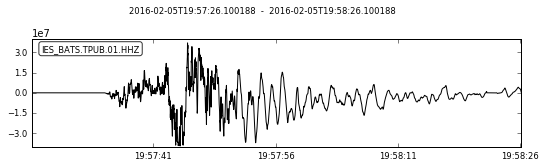

IES_BATS.TPUB.01.HHZ | 2016-02-05T19:57:26.100188Z - 2016-02-05T19:58:26.100188Z | 100.0 Hz, 6001 samples


In [11]:
tr_sac.plot()
print (tr_sac)

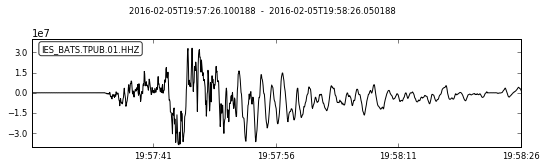

IES_BATS.TPUB.01.HHZ | 2016-02-05T19:57:26.100188Z - 2016-02-05T19:58:26.100188Z | 100.0 Hz, 6001 samples
IES_BATS.TPUB.01.HHZ | 2016-02-05T19:57:26.100188Z - 2016-02-05T19:58:26.050188Z | 20.0 Hz, 1200 samples


In [12]:
tr_sac_copy = tr_sac.copy()
tr_sac_copy.resample(sampling_rate=20.0)
tr_sac_copy.plot()
print (tr_sac)
print (tr_sac_copy)

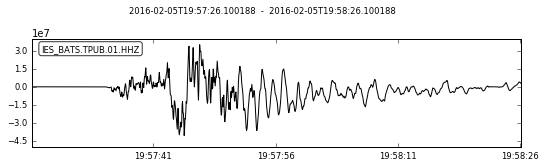

IES_BATS.TPUB.01.HHZ | 2016-02-05T19:57:26.100188Z - 2016-02-05T19:58:26.100188Z | 100.0 Hz, 6001 samples
IES_BATS.TPUB.01.HHZ | 2016-02-05T19:57:26.100188Z - 2016-02-05T19:58:26.100188Z | 20.0 Hz, 1201 samples


In [13]:
tr_sac_copy = tr_sac.copy()
tr_sac_copy.decimate(5)
tr_sac_copy.plot()
print (tr_sac)
print (tr_sac_copy)

---
## Detrend
- Trace.detrend(type='simple', **options)
  * 'simple': Subtracts a linear function defined by first/last sample of the trace
  * 'linear': Fitting a linear function to the trace with least squares and subtracting it
  * 'constant' or 'demean': Mean of data is subtracted
  * 'polynomial': Subtracts a polynomial of a given order
  * 'spline': Subtracts a spline of a given order with a given number of samples between spline nodes

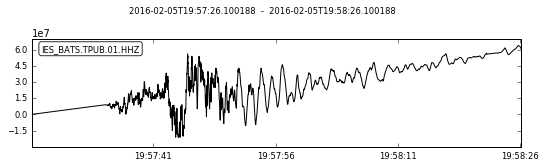

In [14]:
import numpy as np
tr_sac_copy = tr_sac.copy()
tr_sac_copy.data = tr_sac_copy.data + (np.arange(0, len(tr_sac_copy)))*10e3
tr_sac_copy.plot()

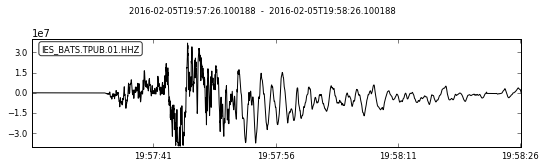

In [15]:
tr_sac_copy.detrend('simple')
tr_sac_copy.plot()

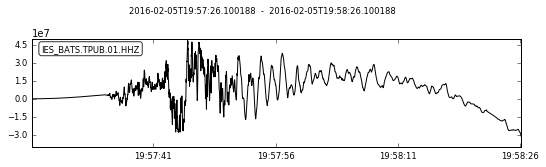

In [16]:
tr_sac_copy = tr_sac.copy()
tr_sac_copy.data += 6000 + 5e4 * tr_sac_copy.times() ** 2
tr_sac_copy.data -= 8e2 * tr_sac_copy.times() ** 3 + 5e-2 * tr_sac_copy.times() ** 5
tr_sac_copy.plot()

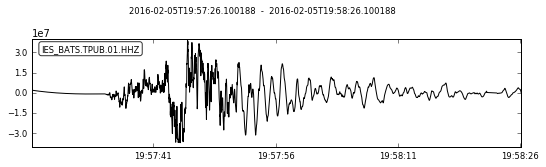

In [17]:
tr_sac_copy.detrend('polynomial', order=4)
tr_sac_copy.plot()

---
## Taper
* Trace.taper(max_percentage, type='hann', max_length=None, side='both', **kwargs)

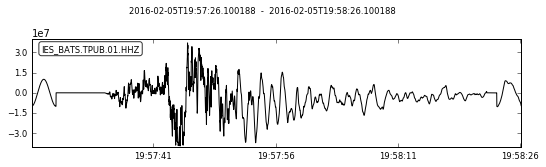

In [18]:
tr_sac_copy = tr_sac.copy()
width = 300
x = np.linspace(-np.pi, np.pi, width)
fake = np.zeros(len(tr_sac_copy))
fake[0:width] = 10e6 * np.cos(x)
fake[len(tr_sac_copy)-width:len(tr_sac_copy)] = 10e6 * np.cos(x)
tr_sac_copy.data = tr_sac_copy.data + fake
tr_sac_copy.plot()

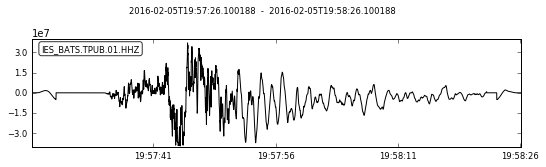

In [19]:
tr_sac_copy.taper(0.1)
tr_sac_copy.plot()

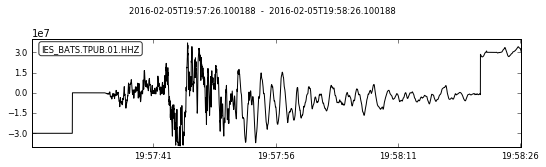

In [20]:
tr_sac_copy = tr_sac.copy()
width = 500
fake = np.zeros(len(tr_sac_copy))
fake[0:width] = -3e7
fake[len(tr_sac_copy)-width:len(tr_sac_copy)] = 3e7
tr_sac_copy.data = tr_sac_copy.data + fake
tr_sac_copy.plot()

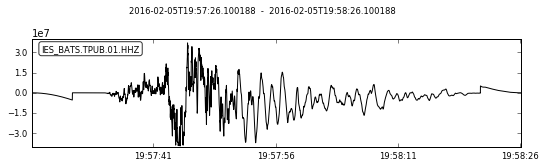

In [21]:
tr_sac_copy.taper(0.3)
tr_sac_copy.plot()

---
## Filter & FFT Spectrum
* Trace.filter(type, **options)
  - 'bandpass': Butterworth-Bandpass
  - 'bandstop': Butterworth-Bandstop
  - 'lowpass': Butterworth-Lowpass
  - 'highpass': Butterworth-Highpass

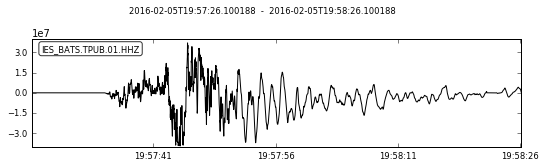

((3001L,), (3001L,))


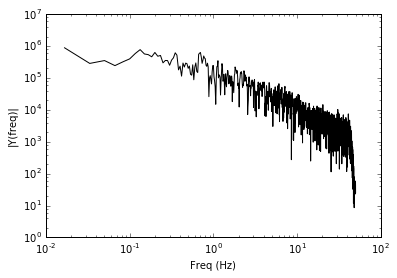

(<matplotlib.figure.Figure at 0xb8efda0>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc0470f0>)

In [22]:
import spectrum
tr_sac_copy = tr_sac.copy()
tr_sac_copy.plot()
spectrum.plot_spectrum(tr_sac_copy.data, 100.0)

### Highpass

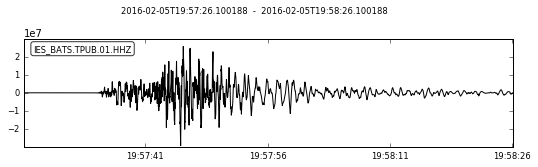

((3001L,), (3001L,))


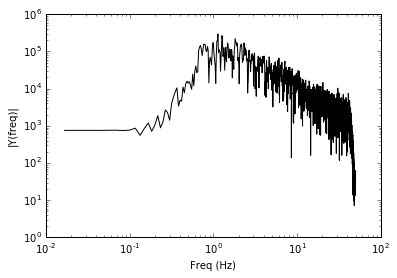

(<matplotlib.figure.Figure at 0xbe24c50>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa80b128>)

In [23]:
tr_sac_copy = tr_sac.copy()
tr_sac_copy = tr_sac_copy.filter('highpass', freq=1.0)
tr_sac_copy.plot()
spectrum.plot_spectrum(tr_sac_copy.data, 100.0)

### Lowpass

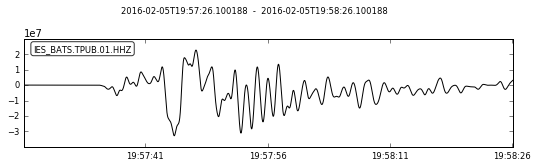

((3001L,), (3001L,))


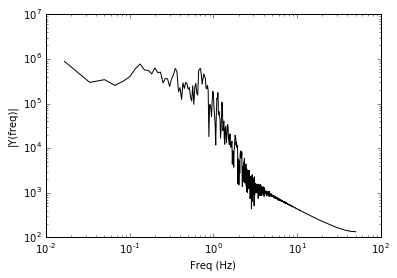

(<matplotlib.figure.Figure at 0xc59dba8>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc697550>)

In [24]:
tr_sac_copy = tr_sac.copy()
tr_sac_copy = tr_sac_copy.filter('lowpass', freq=1.0)
tr_sac_copy.plot()
spectrum.plot_spectrum(tr_sac_copy.data, 100.0)

### Bandstop

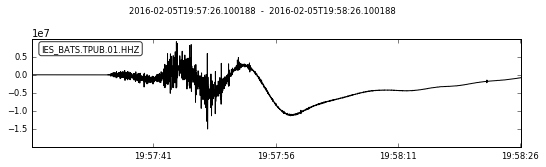

((3001L,), (3001L,))


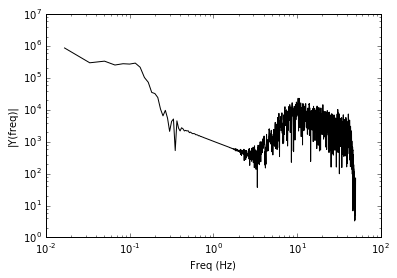

(<matplotlib.figure.Figure at 0xdf14cc0>,
 <matplotlib.axes._subplots.AxesSubplot at 0xe5da320>)

In [25]:
tr_sac_copy = tr_sac.copy()
tr_sac_copy = tr_sac_copy.filter('bandstop', freqmin=0.1, freqmax=10.0)
tr_sac_copy.plot()
spectrum.plot_spectrum(tr_sac_copy.data, 100.0)

### Bandpass

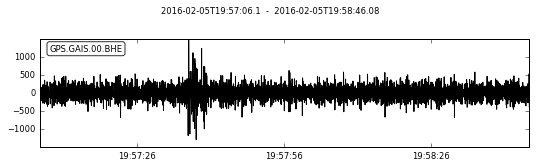

((2501L,), (2501L,))


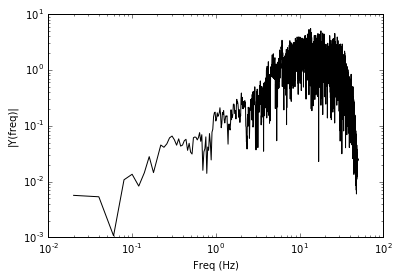

(<matplotlib.figure.Figure at 0xa5c0198>,
 <matplotlib.axes._subplots.AxesSubplot at 0xdf5be48>)

In [26]:
tr_gps = read('data/GPS_GAIS_00_BHE_A.sac')[0]
tr_gps.plot()
spectrum.plot_spectrum(tr_gps.data, 100.0)

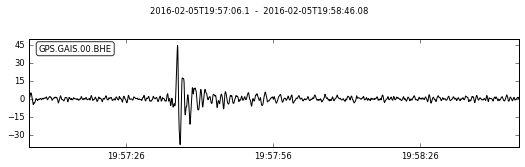

((2501L,), (2501L,))


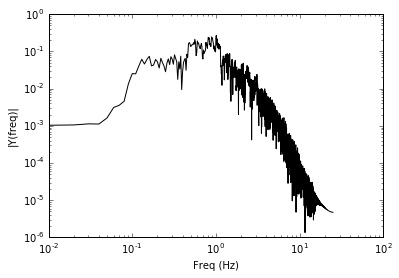

(<matplotlib.figure.Figure at 0xa3f94a8>,
 <matplotlib.axes._subplots.AxesSubplot at 0xf700be0>)

In [27]:
tr_gps_copy = tr_gps.copy()
tr_gps_copy = tr_gps_copy.filter('bandpass', freqmin=0.1, freqmax=1.0)
tr_gps_copy.plot()
spectrum.plot_spectrum(tr_gps_copy.data, tr_gps_copy.stats.sampling_rate, outfile="GPS_GAIS_spectrum.png")

### Spectrogram

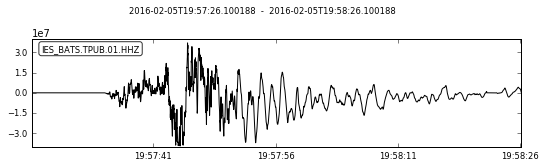

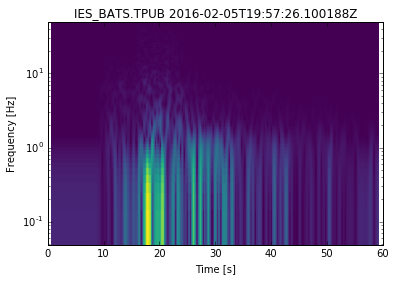

In [28]:
tr_sac.plot()
tr_sac.spectrogram(log=True, title="{0}.{1} {2}".format(
        tr_sac.stats.network, tr_sac.stats.station, str(tr_sac.stats.starttime)))

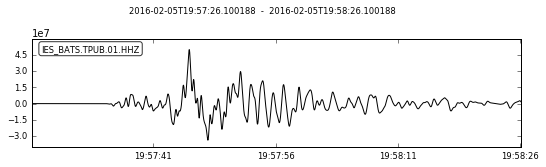

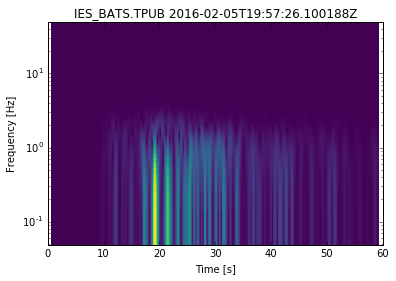

In [29]:
tr_sac_copy = tr_sac.copy()
tr_sac_copy = tr_sac_copy.filter('bandpass', freqmin=0.1, freqmax=2.0) # Be careful when you use filter function!
tr_sac_copy.plot()
tr_sac_copy.spectrogram(log=True, title="{0}.{1} {2}".format(
        tr_sac.stats.network, tr_sac.stats.station, str(tr_sac.stats.starttime)))

---
## Exercise
1. Read sac file (/data/MASB.HHE.IES_BATS.01_2016.036.sac) and cut the 120s time window after 2016-02-05T19:57:26.100000Z.
2. Resample to 20 Hz.
3. Bandpass from 0.01 to 1.0 Hz.
4. Plot waveform, spectrum, and spectrogram.

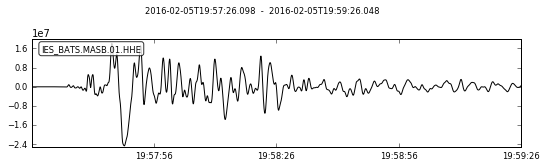

((1201L,), (1201L,))


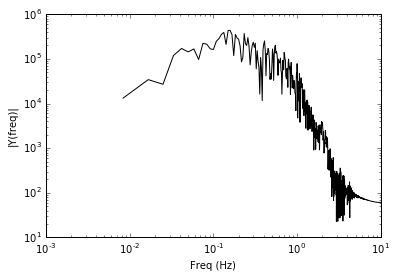

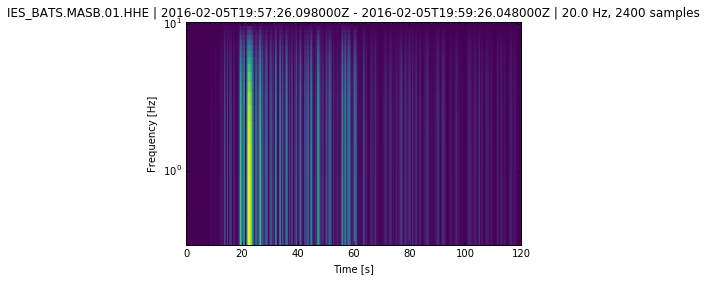

In [30]:
# exercise
%matplotlib inline
from obspy import read
import obspy
import spectrum
t = obspy.UTCDateTime("2016-02-05T19:57:26.100000Z")
st = read("data/MASB.*.sac")
tr = st[0].slice(t, t+120)
tr = tr.resample(20.0)
tr = tr.filter("bandpass", freqmin=0.01, freqmax=1.0)
tr.plot()
spectrum.plot_spectrum(tr.data, tr.stats.sampling_rate)
tr.spectrogram(log=True)